<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/MLex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [71]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import export_text

# Ερώτημα 1

In [72]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


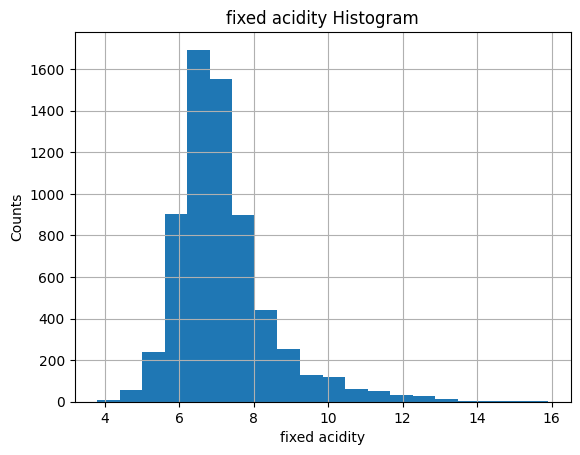

In [73]:
df['fixed acidity'].hist(bins=20)
plt.title('fixed acidity Histogram')
plt.xlabel('fixed acidity')
plt.ylabel('Counts')
plt.show()

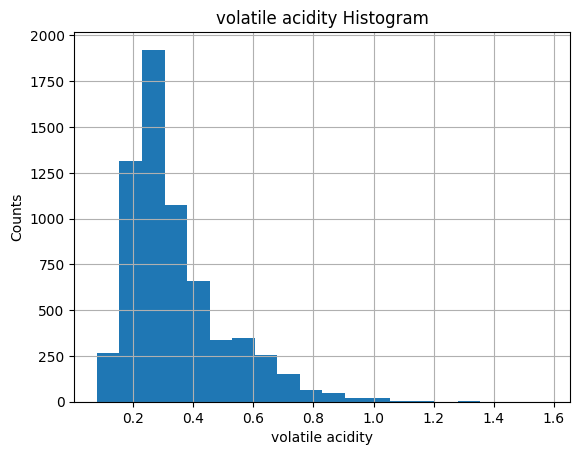

In [74]:
df['volatile acidity'].hist(bins=20)
plt.title('volatile acidity Histogram')
plt.xlabel('volatile acidity')
plt.ylabel('Counts')
plt.show()

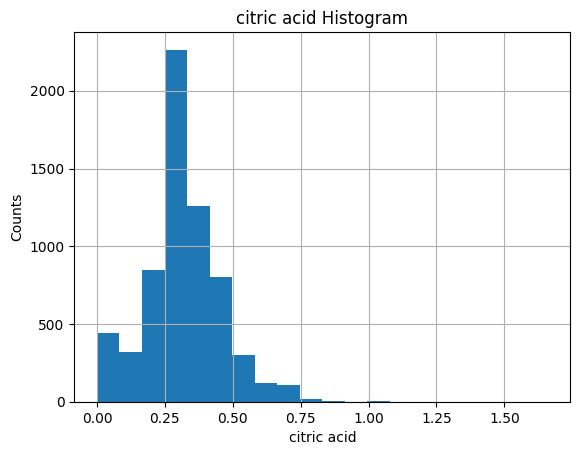

In [75]:
df['citric acid'].hist(bins=20)
plt.title('citric acid Histogram')
plt.xlabel('citric acid')
plt.ylabel('Counts')
plt.show()

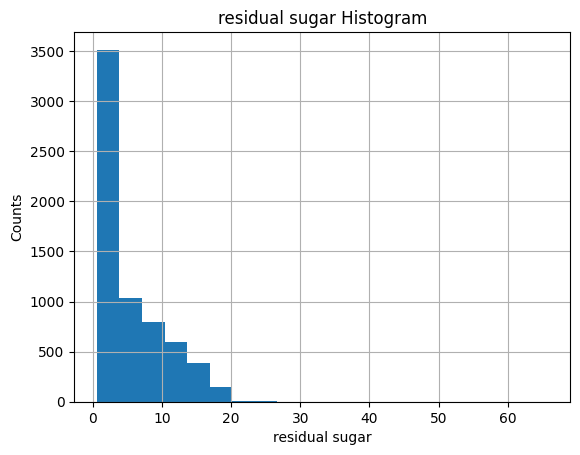

In [76]:
df['residual sugar'].hist(bins=20)
plt.title('residual sugar Histogram')
plt.xlabel('residual sugar')
plt.ylabel('Counts')
plt.show()

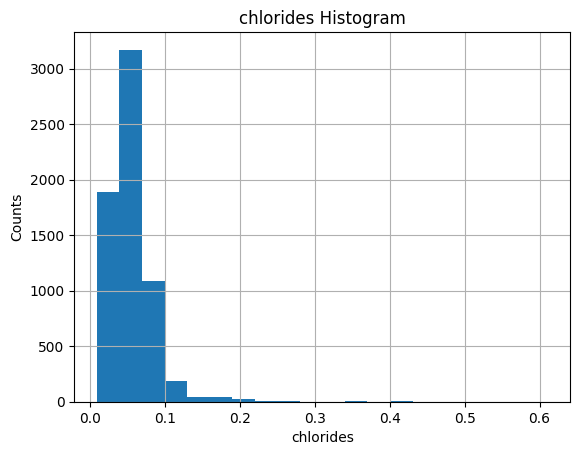

In [77]:
df['chlorides'].hist(bins=20)
plt.title('chlorides Histogram')
plt.xlabel('chlorides')
plt.ylabel('Counts')
plt.show()

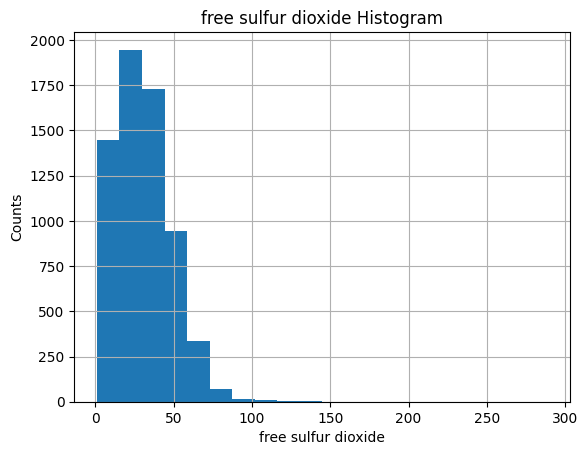

In [78]:
df['free sulfur dioxide'].hist(bins=20)
plt.title('free sulfur dioxide Histogram')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Counts')
plt.show()

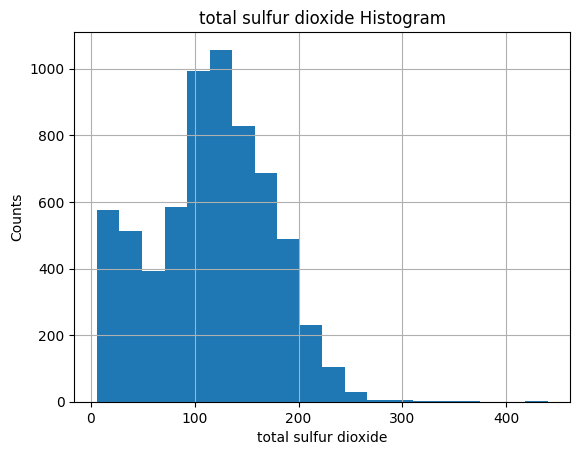

In [79]:
df['total sulfur dioxide'].hist(bins=20)
plt.title('total sulfur dioxide Histogram')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Counts')
plt.show()

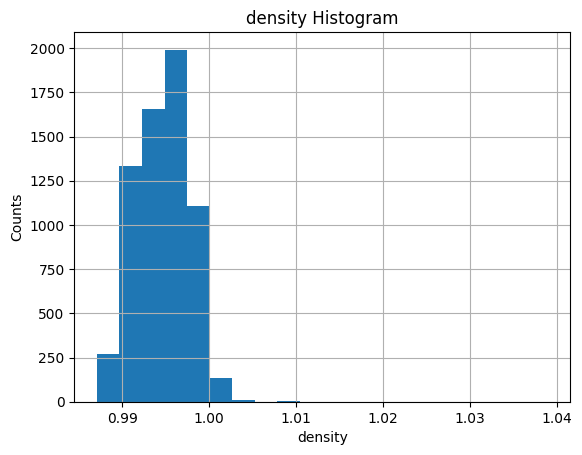

In [80]:
df['density'].hist(bins=20)
plt.title('density Histogram')
plt.xlabel('density')
plt.ylabel('Counts')
plt.show()

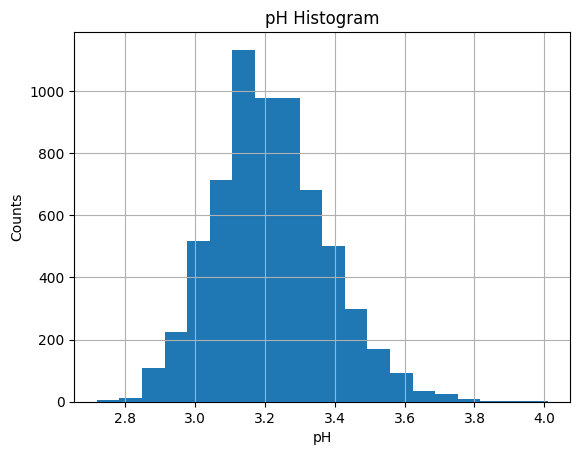

In [81]:
df['pH'].hist(bins=20)
plt.title('pH Histogram')
plt.xlabel('pH')
plt.ylabel('Counts')
plt.show()

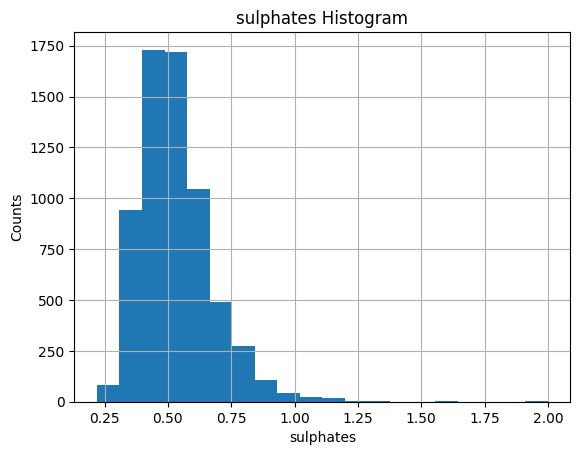

In [82]:
df['sulphates'].hist(bins=20)
plt.title('sulphates Histogram')
plt.xlabel('sulphates')
plt.ylabel('Counts')
plt.show()

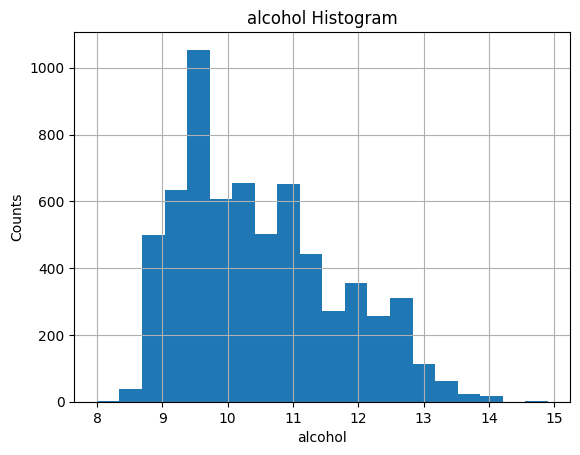

In [83]:
df['alcohol'].hist(bins=20)
plt.title('alcohol Histogram')
plt.xlabel('alcohol')
plt.ylabel('Counts')
plt.show()

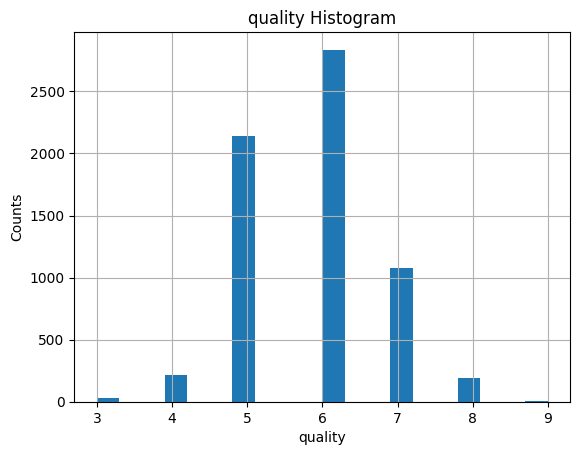

In [84]:
df['quality'].hist(bins=20)
plt.title('quality Histogram')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()

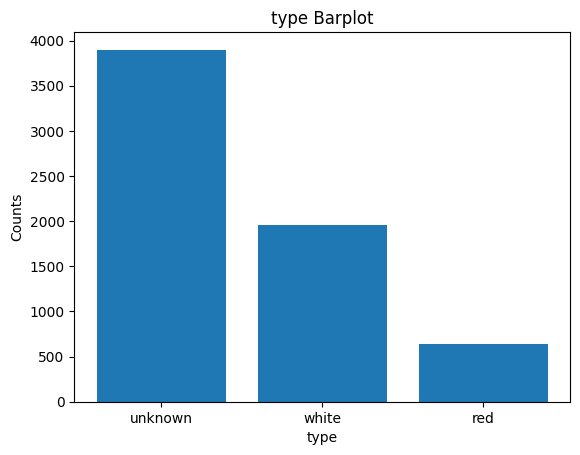

In [85]:
type_counts=df['type'].value_counts()
plt.bar(type_counts.index,type_counts.values)
plt.title('type Barplot')
plt.xlabel('type')
plt.ylabel('Counts')
plt.xticks(type_counts.index)
plt.show()

# Ερώτημα 2

In [86]:
df['type']=df['type'].replace({'white':0, 'red':1, 'unknown':2})



/tmp/ipython-input-745434270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type']=df['type'].replace({'white':0, 'red':1, 'unknown':2})


# Ερώτημα 3

In [87]:
df_known=df[df['type']!=2]
df_unknown=df[df['type']==2]
x_known=df_known.drop(columns=['type']).to_numpy()
y_known=df_known['type'].to_numpy()
x_unknown=df_unknown.drop(columns=['type']).to_numpy()
print(x_known.shape,y_known.shape)
print(x_unknown.shape)

(2599, 12) (2599,)
(3898, 12)


# Ερώτημα 4

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=0.3, random_state=42,stratify=y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

# Ερώτηση 5

In [89]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)
print(f'Accuracy in train set: {accuracy}')
print(f'Precision in train set: {precision}')
print(f'Recall in train set: {recall}')
print(f'F1 in train set: {f1}\n')
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy in test set: {accuracy}')
print(f'Precision in test set: {precision}')
print(f'Recall in test set: {recall}')
print(f'F1 in test set: {f1}')


Accuracy in train set: 0.999450247388675
Precision in train set: 0.9977728285077951
Recall in train set: 1.0
F1 in train set: 0.9988851727982163

Accuracy in test set: 0.9987179487179487
Precision in test set: 0.9948186528497409
Recall in test set: 1.0
F1 in test set: 0.9974025974025974


Θεωρώ πως η μετρική f1 είναι πιο αξιόπιστη καθώς είναι ένας συνδυασμός του precision με το recall και δεν επηρεάζεται από την ανισορροπία των κλάσεων red και white, με αποτέλεσμα να μπορούμε να καταλάβουμε καλύτερα πόσο καλά ταξινομεί το μοντέλο.

# Ερώτημα 6

In [90]:
model=RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
precision=precision_score(y_train,y_pred)
recall=recall_score(y_train,y_pred)
f1=f1_score(y_train,y_pred)
print(f'Accuracy in train set: {accuracy}')
print(f'Precision in train set: {precision}')
print(f'Recall in train set: {recall}')
print(f'F1 in train set: {f1}\n')
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy in test set: {accuracy}')
print(f'Precision in test set: {precision}')
print(f'Recall in test set: {recall}')
print(f'F1 in test set: {f1}')

Accuracy in train set: 0.999450247388675
Precision in train set: 0.9977728285077951
Recall in train set: 1.0
F1 in train set: 0.9988851727982163

Accuracy in test set: 0.9948717948717949
Precision in test set: 0.9947368421052631
Recall in test set: 0.984375
F1 in test set: 0.9895287958115183


Η παράμετρος class_weight='balanced' προσαρμόζει τα βάρη των κλάσεων ανάλογα με το πόσο συχνά εμφανίζονται στο training set. Οι λιγότερο συχνές κλάσεις έχουν μεγαλύτερο βάρος σε σχέση με τις πιο συχνές.

# Ερώτημα 7

In [91]:
y_unknown_proba=model.predict_proba(x_unknown)
print(y_unknown_proba)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]]


# Ερώτημα 8

In [92]:
p_red=y_unknown_proba[:,1]
y_unknown_pred=np.array(["unknown"]*len(p_red))
y_unknown_pred[p_red>0.65]="red"
y_unknown_pred[p_red<0.35]="white"
print(y_unknown_pred)

['white' 'white' 'white' ... 'red' 'red' 'red']


# Ερώτημα 9

In [93]:
x8=x_unknown[y_unknown_pred!="unknown"]
y8=y_unknown_pred[y_unknown_pred!="unknown"]
y8=np.where(y8=="red",1,0)
x_total_train=np.vstack([x_train,x8])
y_total_train=np.concatenate([y_train,y8])
model_rfc=RandomForestClassifier(random_state=42,class_weight='balanced')
model_rfc.fit(x_total_train,y_total_train)
y_pred_rfc=model_rfc.predict(x_total_train)
accuracy=accuracy_score(y_total_train,y_pred_rfc)
print(f'Accuracy in train set:{accuracy}')
y_pred_rfc=model_rfc.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_rfc)
print(f'Accuracy in test set:{accuracy}')



Accuracy in train set:0.9998235086480762
Accuracy in test set:0.9948717948717949


# Ερώτημα 10

In [94]:
x_train_it = x_train.copy()
y_train_it = y_train.copy()
x_unknown_it = x_unknown.copy()
while True:
  y_unknown_proba=model.predict_proba(x_unknown_it)
  p_red = y_unknown_proba[:, 1]
  n_conf_samples=((p_red > 0.65) | (p_red < 0.35)).sum()
  if n_conf_samples==0:
    break
  x10 = x_unknown_it[(p_red > 0.65) | (p_red < 0.35)]
  y10=np.where(p_red[(p_red > 0.65) | (p_red < 0.35)]>0.65,1,0)
  x_train_it = np.vstack([x_train_it, x10])
  y_train_it = np.concatenate([y_train_it, y10])
  x_unknown_it = x_unknown_it[~((p_red > 0.65) | (p_red < 0.35))]
  model = RandomForestClassifier( random_state=42,class_weight='balanced')
  model.fit(x_train_it, y_train_it)

# Ερώτημα 2.1

In [95]:
df2=pd.read_csv('wine-full.csv')
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


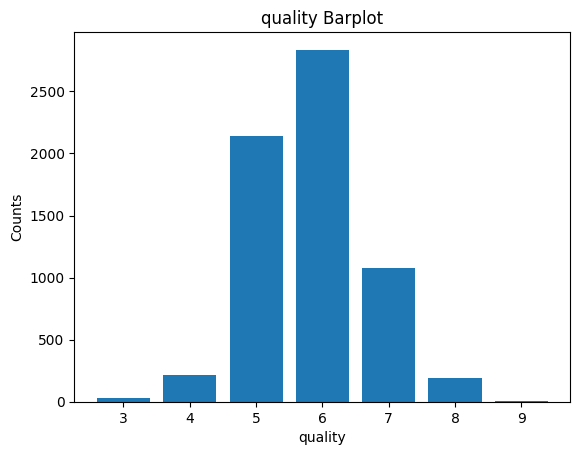

In [96]:
quality_counts=df2['quality'].value_counts()
plt.bar(quality_counts.index,quality_counts.values)
plt.title('quality Barplot')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.xticks(quality_counts.index)
plt.show()

Δε θεωρώ πως το quality είναι ισορροπημένο, καθώς υπάρχουν πολλά παραδείγματα με τιμή 5 και 6, αρκετά λιγότερα με 7, και πολύ λιγότερα με τις υπόλοιπες τιμές (3,4,8,9).

# Ερώτημα 2.2

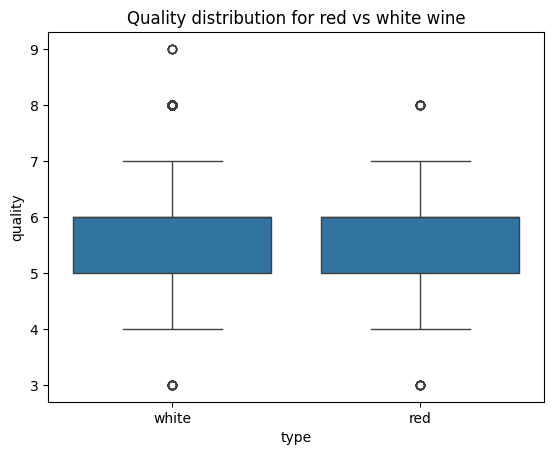

Mean quality for red wine: 5.6360225140712945
Mean quality for white wine: 5.87790935075541


In [97]:
red = df2[df2['type'] == "red"]['quality']
white = df2[df2['type'] == "white"]['quality']
sns.boxplot(x=df2['type'], y=df2['quality'])
plt.title("Quality distribution for red vs white wine")
plt.show()
print("Mean quality for red wine:", red.mean())
print("Mean quality for white wine:", white.mean())

Παρατηρούμε ότι δεν υπάρχει μεγάλη διαφορά στη ποιότητα λευκού/κόκκινου. Το λευκό είναι απλά ελαυρώς καλύτερο με βάση τη μέση ποιότητα της κάθε κατηγορίας κρασιού και το γεγονός ότι τα υψηλά outliers είναι περισσότερα στο λευκό κρασί.

# Ερώτημα 2.3

/tmp/ipython-input-2033717062.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dry, sweet], labels=["Dry","Sweet"])


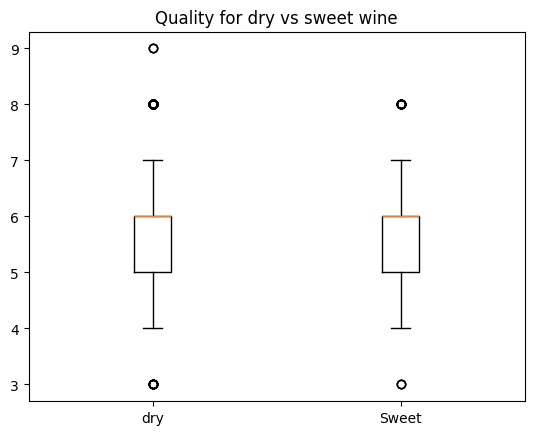

Mean for dry wine: 5.818592822831309
Mean for sweet wine: 5.7564705882352944


In [98]:
dry = df2[df2['residual sugar'] < 4]['quality']
sweet = df2[df2['residual sugar'] >= 12]['quality']
plt.boxplot([dry, sweet], labels=["Dry","Sweet"])
plt.xticks([1,2], ["dry", "Sweet"])
plt.title("Quality for dry vs sweet wine")
plt.show()
print("Mean for dry wine:", dry.mean())
print("Mean for sweet wine:", sweet.mean())


Και εδώ παρατηρούμε ότι δεν υπάρχει μεγάλη διαφορά στην ποιότητα μεταξύ ξηρού/γλυκού. Το ξηρό απλά είναι ελαφρώς καλύτερο με βάση τη μέση ποιότητα της κάθε κατηγορίας και το γεγονός ότι τα υψηλότερα outliers είναι περισσότερα στο ξηρό.

# Ερώτημα 2.4

In [99]:
input_df = df2.drop(columns=['quality','type'])
targets_df = df['quality']
x = input_df.to_numpy()
y = targets_df.to_numpy()
seed = 0
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 11), (5847,), (650, 11), (650,))

# Ερώτημα 2.5

In [100]:
model=DecisionTreeRegressor(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mae_trainset=mean_absolute_error(y_test,y_pred)
print(f'mae in train set={mae_trainset:.2f}')

mae in train set=0.44


# Ερώτημα 2.6

In [101]:
mae_scores=[]
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
  model=DecisionTreeRegressor(random_state=0)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  mae=mean_absolute_error(y_test,y_pred)
  mae_scores.append(mae)
print(f'mean mae:{np.mean(mae_scores)}')
print(f'std mae:{np.std(mae_scores)}')

mean mae:0.46230769230769236
std mae:0.0257272907847729


Ο μέσος όρος είναι μια εκτίμηση του αναμενόμενου σφάλματος του μοντέλου. Εδώ, έχουμε μικρή τυπική απόκλιση, που σημαίνει ότι το μοντέλο είναι πιο αξιόπιστο γιατί δεν αλλάζει πολύ η απόδοση του σε κάθε επανάληψη. Αν είχαμε μεγαλύτερη τυπική απόκλιση, τότε θα είχαμε μεγαλύτερη αβεβαιότητα όσο αναφορά το αναμενόμενο σφάλμα και άρα θα χρειαζόμασταν περισσότερα δεδομένα.

# Ερώτημα 2.7

In [102]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

x_train,x_val,y_train,y_val=train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=0)

depths=[4,5,8]
leaves=[1,2,4,6,8]
result=[]
for d in depths:
  for l in leaves:
    model=DecisionTreeRegressor(random_state=0,max_depth=d,min_samples_leaf=l)
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    mae_train=mean_absolute_error(y_train,y_train_pred)
    y_val_pred=model.predict(x_val)
    mae_val=mean_absolute_error(y_val,y_val_pred)
    result.append({
            "max_depth": d,
            "min_samples_leaf": l,
            "mae_train": mae_train,
            "mae_val": mae_val
        })
dfres=pd.DataFrame(result)
print(dfres)

    max_depth  min_samples_leaf  mae_train   mae_val
0           4                 1   0.566877  0.574325
1           4                 2   0.566075  0.573401
2           4                 4   0.569058  0.573144
3           4                 6   0.569058  0.573144
4           4                 8   0.569058  0.573144
5           5                 1   0.542107  0.568657
6           5                 2   0.542450  0.570776
7           5                 4   0.541846  0.570890
8           5                 6   0.539514  0.565721
9           5                 8   0.539514  0.565721
10          8                 1   0.448569  0.549740
11          8                 2   0.456282  0.553126
12          8                 4   0.463558  0.550284
13          8                 6   0.469159  0.545683
14          8                 8   0.474792  0.554183


# Ερώτημα 2.8

Θεωρώ ότι το validation set είναι πιο αξιόπιστο για αυτή τη δουλειά, διότι το val set περιέχει δεδομένα που δεν έχουν χρησιμοποιηθεί για την εκπαίδευση του μοντέλου. Στο training set το error είναι μή ρεαλιστικά πιο χαμηλό καθώς απομνημονεύει τα δεδομένα εκπαίδευσης χωρίς να μαθαίνει πραγματικά τη δομή τους.

# Ερώτημα 2.9

In [103]:
model=DecisionTreeRegressor(random_state=0)
param_grid = {
    'max_depth': [5,10,15,20,None],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
print("best parametres:",grid_search.best_params_)
print("best CV mae:", -grid_search.best_score_)



best parametres: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
best CV mae: 0.5259012735105879


# Ερώτημα 2.10

In [104]:
best_model=grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
print("mae in test set:",mae)

mae in test set: 0.49135431863733753


Περισσότερο αξιόπιστη ήταν αυτή στο ερώτημα 9, καθώς είχαμε μικρότερο mae σε σχέση με τις άλλες μεθοδολογίες.

# Ερώτημα 2.11

best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
best CV mae: 0.56711356247465


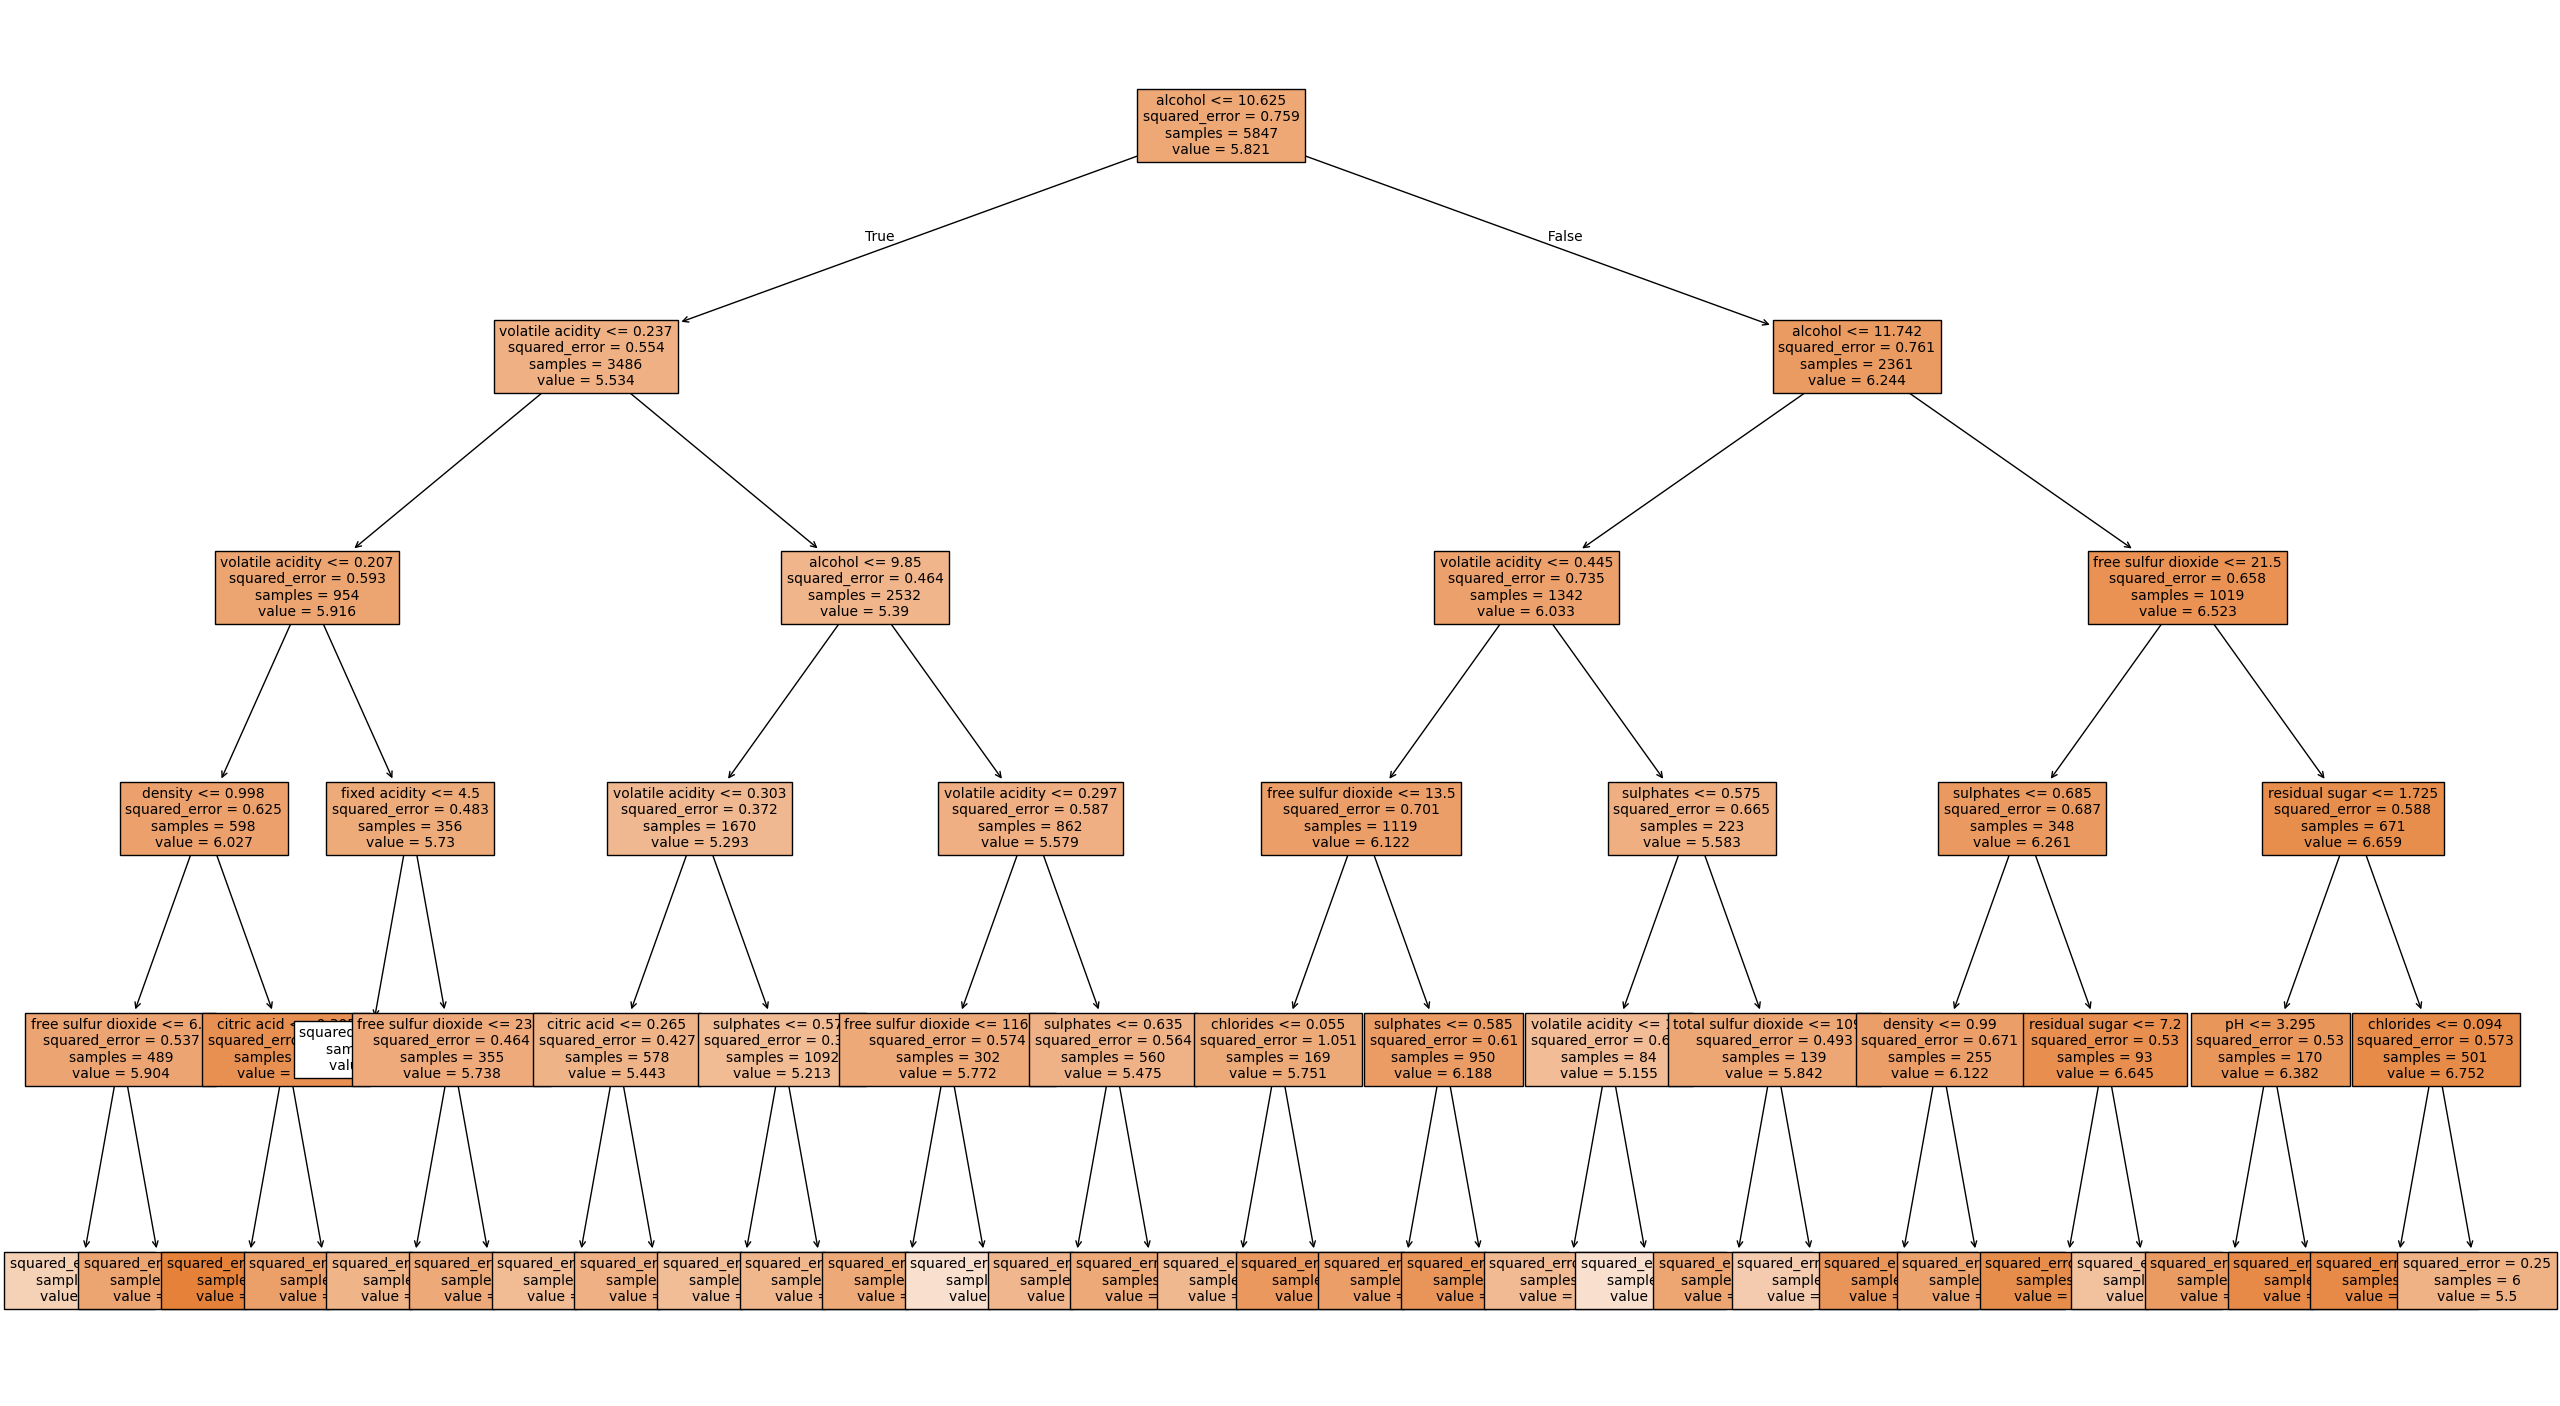

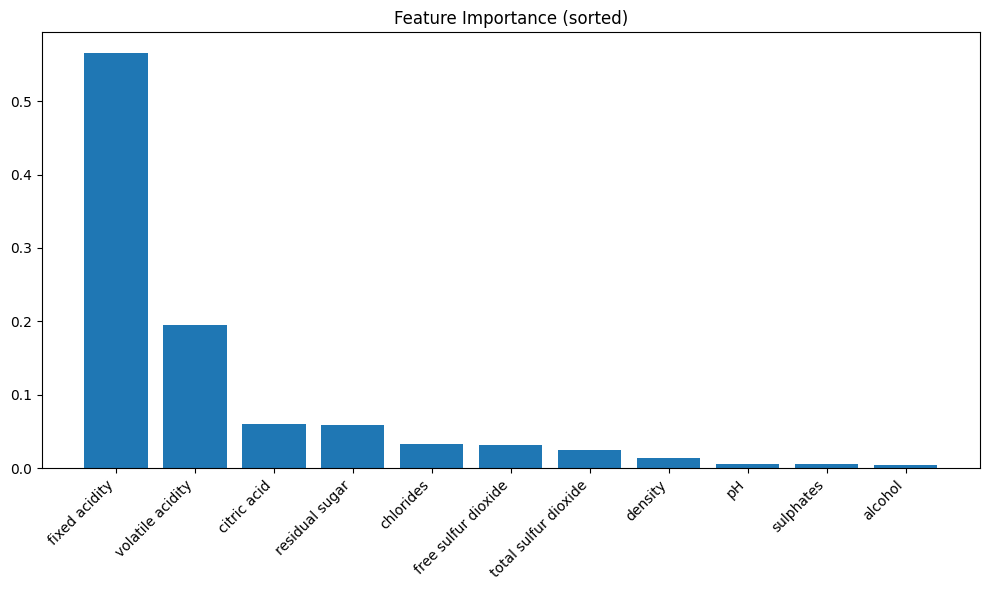

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 6.50
|   |   |   |   |   |--- value: [4.50]
|   |   |   |   |--- free sulfur dioxide >  6.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- fixed acidity <= 4.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- fixed acidity >  4.50
|   |   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |   |--- value: [5.44]
|   |   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |   |--- value: [5.80]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- citric acid <= 0.27
|   |   |   |   |   |--- valu

In [105]:
model = DecisionTreeRegressor(random_state=0, max_depth=5)
param_grid = {
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=10,n_jobs=-1)
grid.fit(x_train_full, y_train_full)
print("best parameters:", grid.best_params_)
print("best CV mae:", -grid.best_score_)
features = df2.columns.drop(["type", "quality"])
best_tree = grid.best_estimator_
best_tree.fit(x_train_full, y_train_full)
plt.figure(figsize=(32, 18))
plot_tree(best_tree, feature_names=features, filled=True, fontsize=10)
plt.show()
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features, rotation=45, ha='right')
plt.title("Feature Importance (sorted)")
plt.tight_layout()
plt.show()
rules = export_text(best_tree, feature_names=features)
print(rules)